In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('googlead-performance.csv')

In [ ]:
df

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,2024-01-01,Cross-network,216382.0,2765.0,1957.4,136.1,17835.5
1,2024-01-01,Display Network,3873.0,85.0,27.2,1.0,84.6
2,2024-01-01,Search Network,6856.0,753.0,917.3,54.7,8777.1
3,2024-01-02,Cross-network,236636.0,2750.0,2055.9,148.9,19639.5
4,2024-01-02,Display Network,5030.0,96.0,26.7,0.8,91.2
...,...,...,...,...,...,...,...
465,2024-06-28,Search Network,6793.0,672.0,586.2,55.4,9464.4
466,2024-06-29,Cross-network,183267.0,2125.0,1500.3,111.1,11849.8
467,2024-06-29,Search Network,7788.0,727.0,660.8,54.8,7517.2
468,2024-06-30,Cross-network,207606.0,2360.0,1724.2,118.6,15217.4


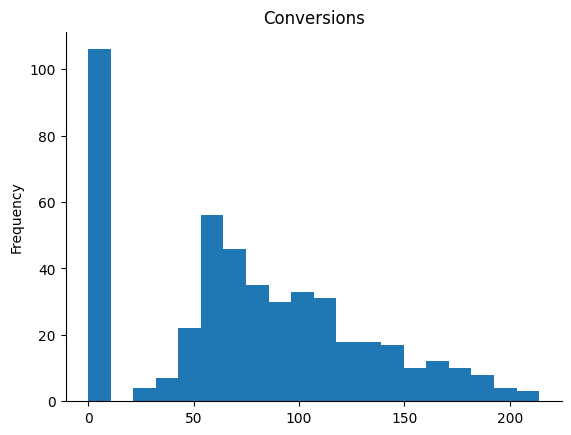

In [ ]:
from matplotlib import pyplot as plt
df['Conversions'].plot(kind='hist', bins=20, title='Conversions')
plt.gca().spines[['top', 'right',]].set_visible(False)

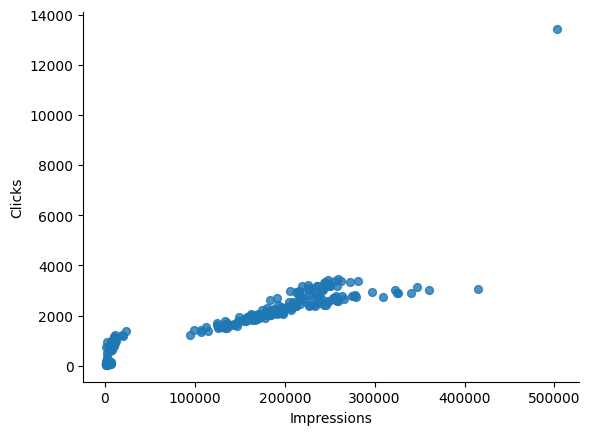

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Impressions', y='Clicks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

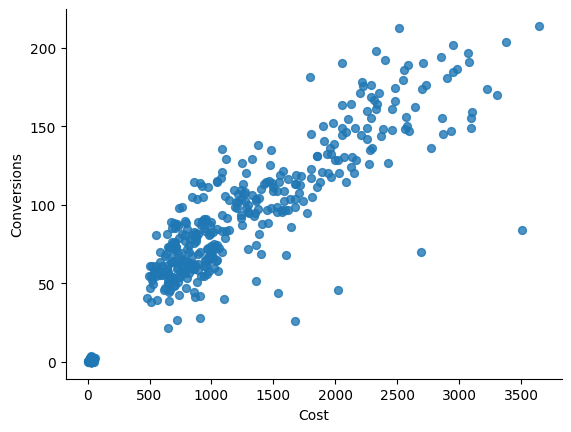

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Cost', y='Conversions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

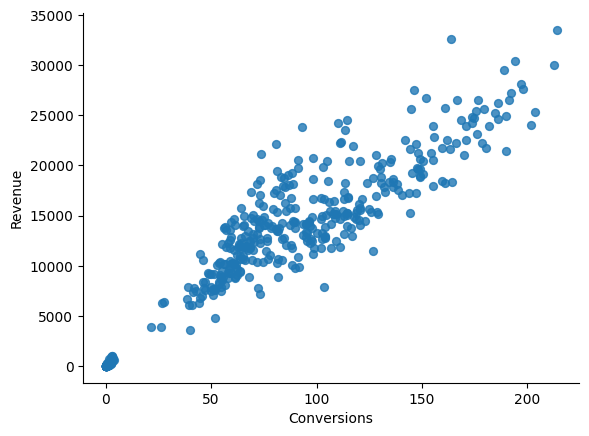

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Conversions', y='Revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

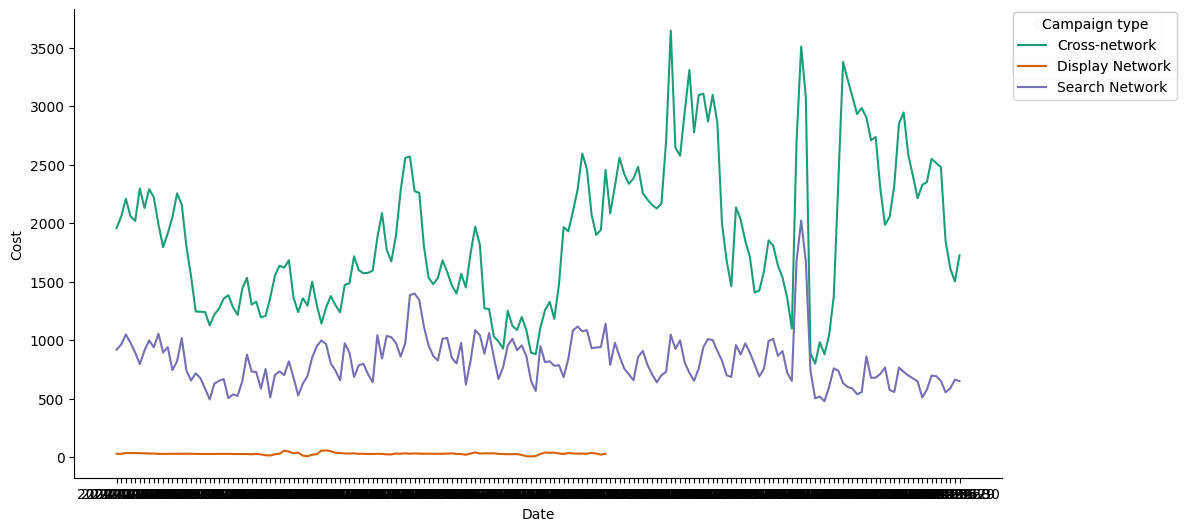

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Cost']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Campaign type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Campaign type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Cost')

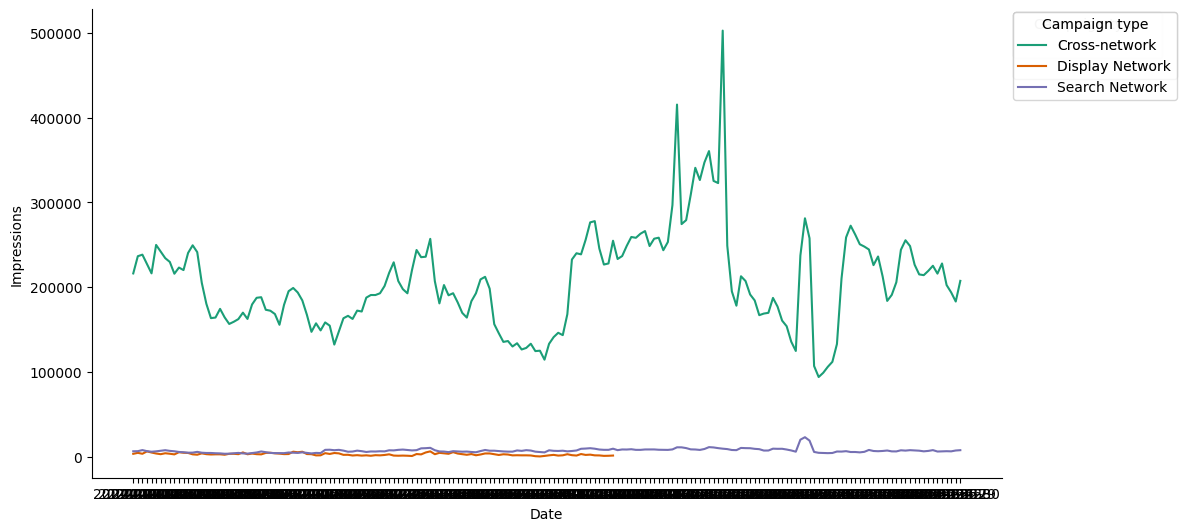

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Impressions']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Campaign type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Campaign type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Impressions')

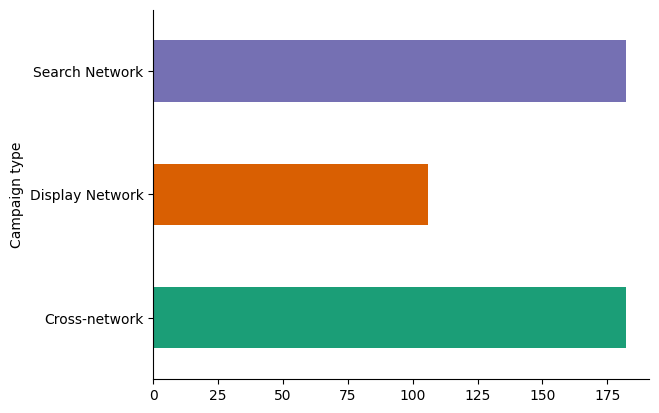

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Campaign type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.isnull().sum()

,0
Date,0
Campaign type,0
Impressions,0
Clicks,0
Cost,0
Conversions,0
Revenue,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           470 non-null    object 
 1   Campaign type  470 non-null    object 
 2   Impressions    470 non-null    float64
 3   Clicks         470 non-null    float64
 4   Cost           470 non-null    float64
 5   Conversions    470 non-null    float64
 6   Revenue        470 non-null    float64
dtypes: float64(5), object(2)
memory usage: 25.8+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month


In [ ]:
df.describe()

,Date,Impressions,Clicks,Cost,Conversions,Revenue,month
count,470,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,2024-03-22 22:18:53.617021440,83660.123404,1283.489362,1055.711702,76.038298,11733.801489,3.225532
min,2024-01-01 00:00:00,800.000000,29.000000,4.600000,0.000000,0.000000,1.000000
25%,2024-02-09 00:00:00,5074.750000,668.500000,553.350000,43.200000,6980.750000,2.000000
50%,2024-03-19 00:00:00,8438.500000,867.000000,907.200000,73.250000,12625.800000,3.000000
75%,2024-05-02 18:00:00,181967.750000,2072.500000,1549.275000,112.250000,16930.125000,5.000000
max,2024-06-30 00:00:00,502368.000000,13429.000000,3646.400000,213.900000,33528.200000,6.000000
std,NaN,104072.597175,1132.614988,835.493118,54.224895,7871.955734,1.663668


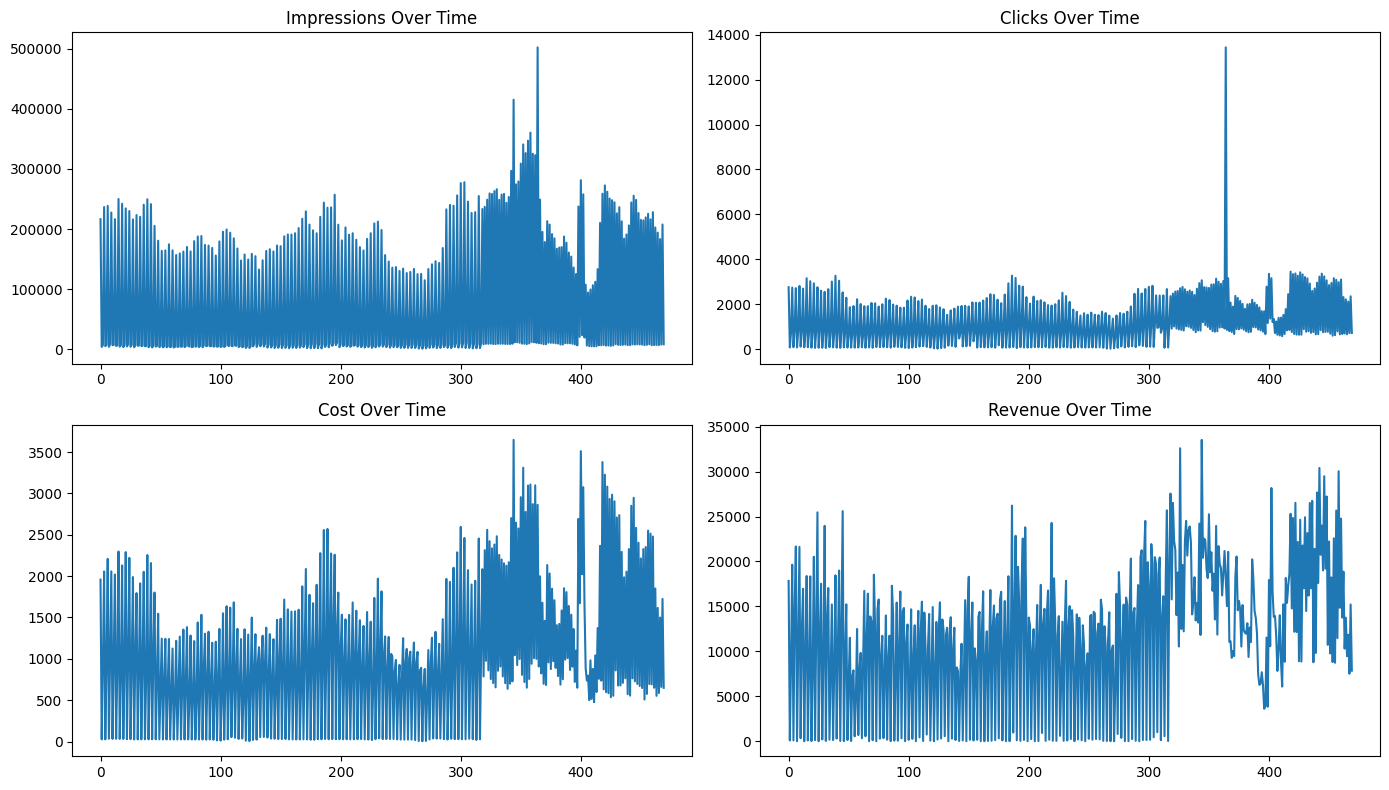

In [ ]:
def plot_trends(df):
    plt.figure(figsize=(14, 8))
    plt.subplot(2, 2, 1)
    df['Impressions'].plot(title='Impressions Over Time')
    plt.subplot(2, 2, 2)
    df['Clicks'].plot(title='Clicks Over Time')
    plt.subplot(2, 2, 3)
    df['Cost'].plot(title='Cost Over Time')
    plt.subplot(2, 2, 4)
    df['Revenue'].plot(title='Revenue Over Time')
    plt.tight_layout()
    plt.show()

plot_trends(df)


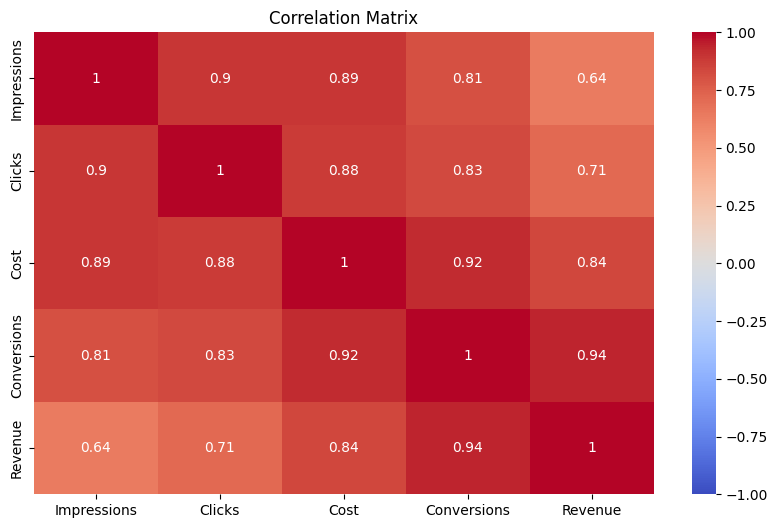

In [ ]:
def plot_correlation_matrix(df):
    corr = df[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(df)


In [ ]:
df.describe()

,Date,Impressions,Clicks,Cost,Conversions,Revenue,month
count,470,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,2024-03-22 22:18:53.617021440,83660.123404,1283.489362,1055.711702,76.038298,11733.801489,3.225532
min,2024-01-01 00:00:00,800.000000,29.000000,4.600000,0.000000,0.000000,1.000000
25%,2024-02-09 00:00:00,5074.750000,668.500000,553.350000,43.200000,6980.750000,2.000000
50%,2024-03-19 00:00:00,8438.500000,867.000000,907.200000,73.250000,12625.800000,3.000000
75%,2024-05-02 18:00:00,181967.750000,2072.500000,1549.275000,112.250000,16930.125000,5.000000
max,2024-06-30 00:00:00,502368.000000,13429.000000,3646.400000,213.900000,33528.200000,6.000000
std,NaN,104072.597175,1132.614988,835.493118,54.224895,7871.955734,1.663668


In [ ]:
df['profit']=df['Revenue']-df['Cost']

In [ ]:
df

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,month,profit
0,2024-01-01,Cross-network,216382.0,2765.0,1957.4,136.1,17835.5,1,15878.1
1,2024-01-01,Display Network,3873.0,85.0,27.2,1.0,84.6,1,57.4
2,2024-01-01,Search Network,6856.0,753.0,917.3,54.7,8777.1,1,7859.8
3,2024-01-02,Cross-network,236636.0,2750.0,2055.9,148.9,19639.5,1,17583.6
4,2024-01-02,Display Network,5030.0,96.0,26.7,0.8,91.2,1,64.5
...,...,...,...,...,...,...,...,...,...
465,2024-06-28,Search Network,6793.0,672.0,586.2,55.4,9464.4,6,8878.2
466,2024-06-29,Cross-network,183267.0,2125.0,1500.3,111.1,11849.8,6,10349.5
467,2024-06-29,Search Network,7788.0,727.0,660.8,54.8,7517.2,6,6856.4
468,2024-06-30,Cross-network,207606.0,2360.0,1724.2,118.6,15217.4,6,13493.2


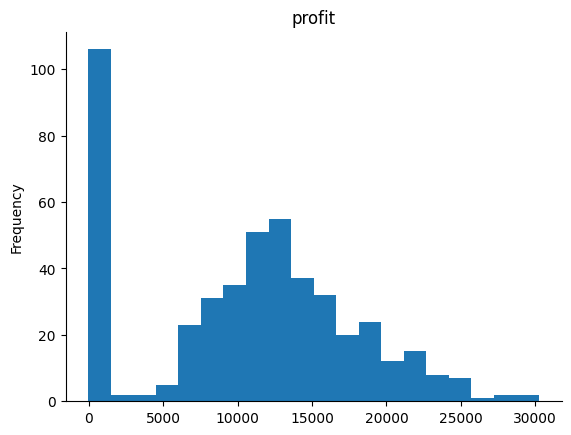

In [ ]:
df['profit'].plot(kind='hist', bins=20, title='profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

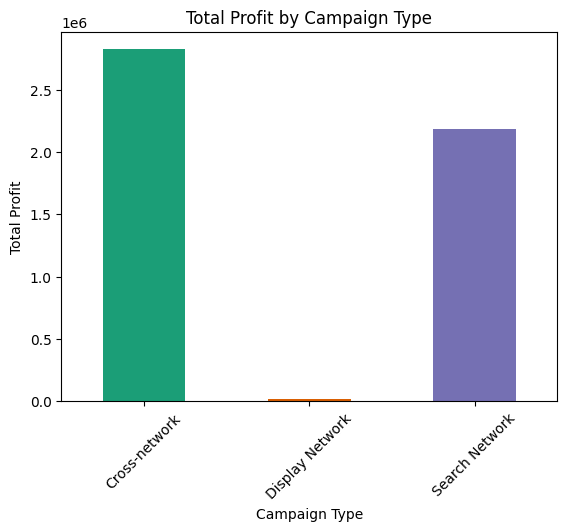

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


profit_by_campaign_type = df.groupby('Campaign type')['profit'].sum()


profit_by_campaign_type.plot(kind='bar', color=sns.color_palette('Dark2'))
plt.xlabel('Campaign Type')
plt.ylabel('Total Profit')
plt.title('Total Profit by Campaign Type')
plt.xticks(rotation=45)
plt.show()


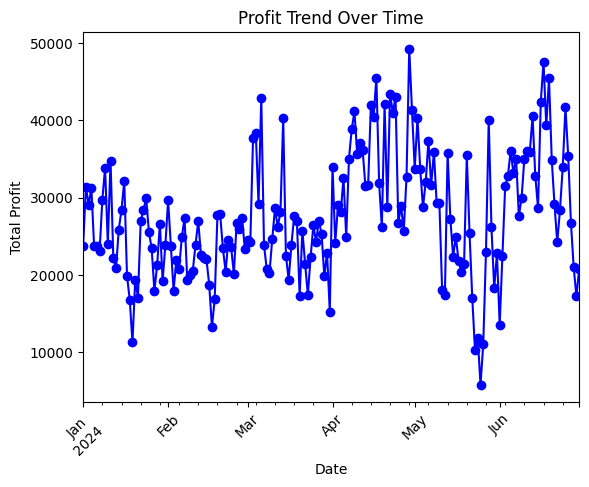

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])

profit_by_date = df.groupby('Date')['profit'].sum()


profit_by_date.plot(kind='line', marker='o', color='b')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.title('Profit Trend Over Time')
plt.xticks(rotation=45)
plt.show()


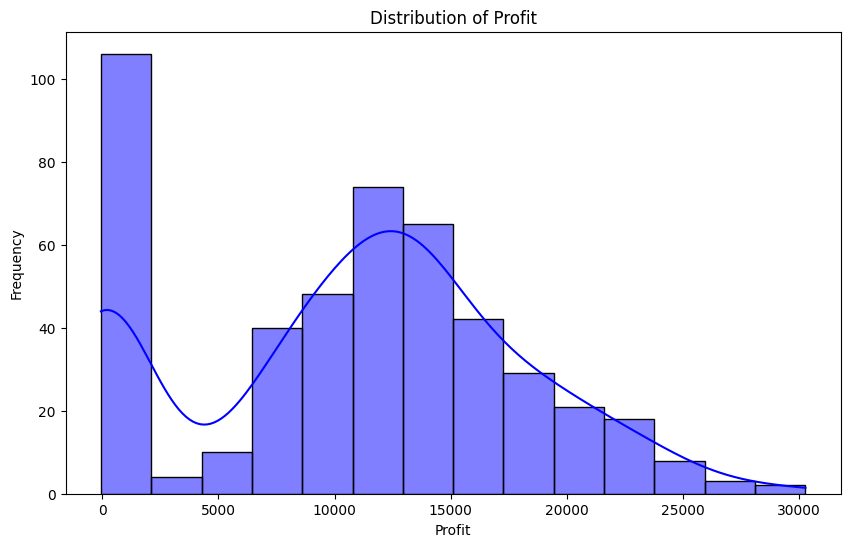

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['profit'], kde=True, color='b')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit')
plt.show()


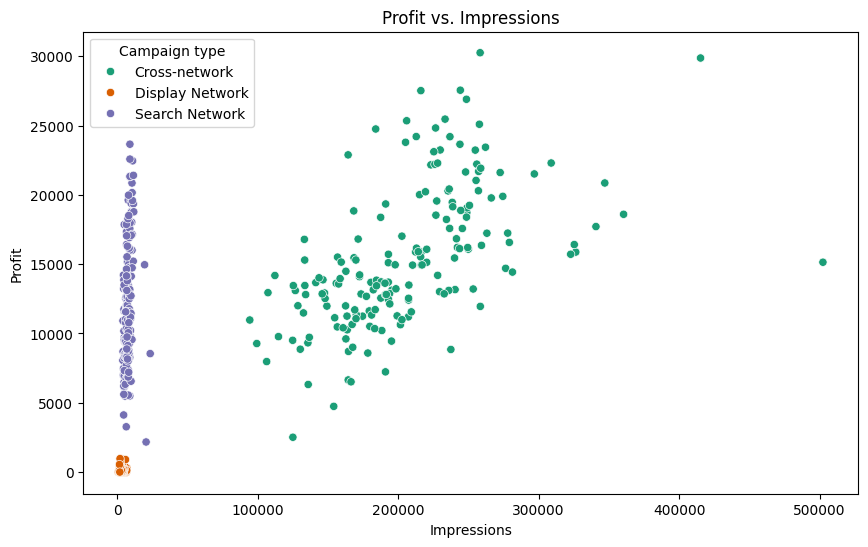

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Impressions', y='profit', data=df, hue='Campaign type', palette='Dark2')
plt.xlabel('Impressions')
plt.ylabel('Profit')
plt.title('Profit vs. Impressions')
plt.show()


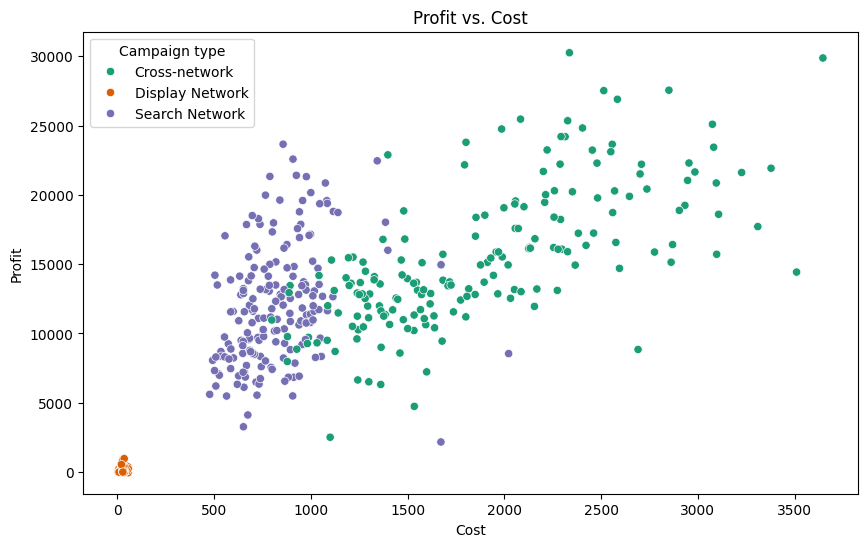

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost', y='profit', data=df, hue='Campaign type', palette='Dark2')
plt.xlabel('Cost')
plt.ylabel('Profit')
plt.title('Profit vs. Cost')
plt.show()


In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ROI', y='profit', data=df, hue='Campaign type', palette='Dark2')
plt.xlabel('ROI')
plt.ylabel('Profit')
plt.title('Profit vs. ROI')
plt.show()


ValueError: Could not interpret value `ROI` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

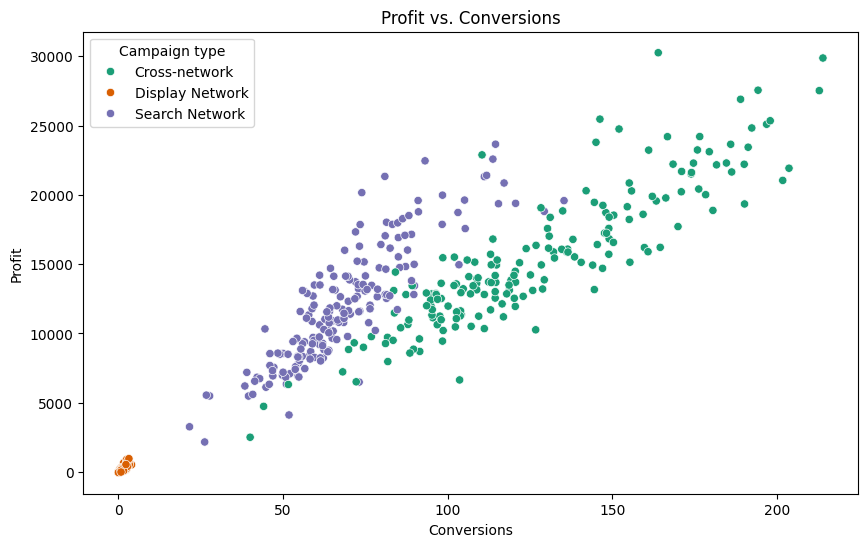

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Conversions', y='profit', data=df, hue='Campaign type', palette='Dark2')
plt.xlabel('Conversions')
plt.ylabel('Profit')
plt.title('Profit vs. Conversions')
plt.show()


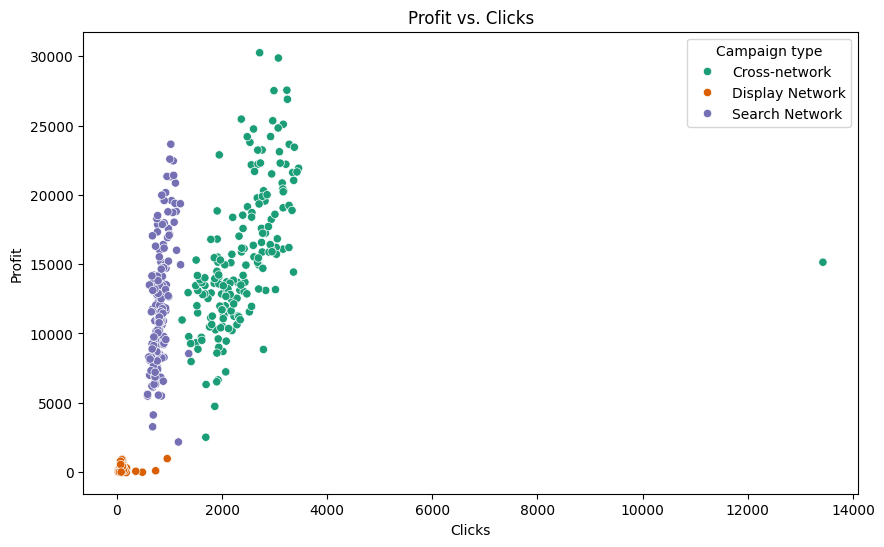

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Clicks', y='profit', data=df, hue='Campaign type', palette='Dark2')
plt.xlabel('Clicks')
plt.ylabel('Profit')
plt.title('Profit vs. Clicks')
plt.show()


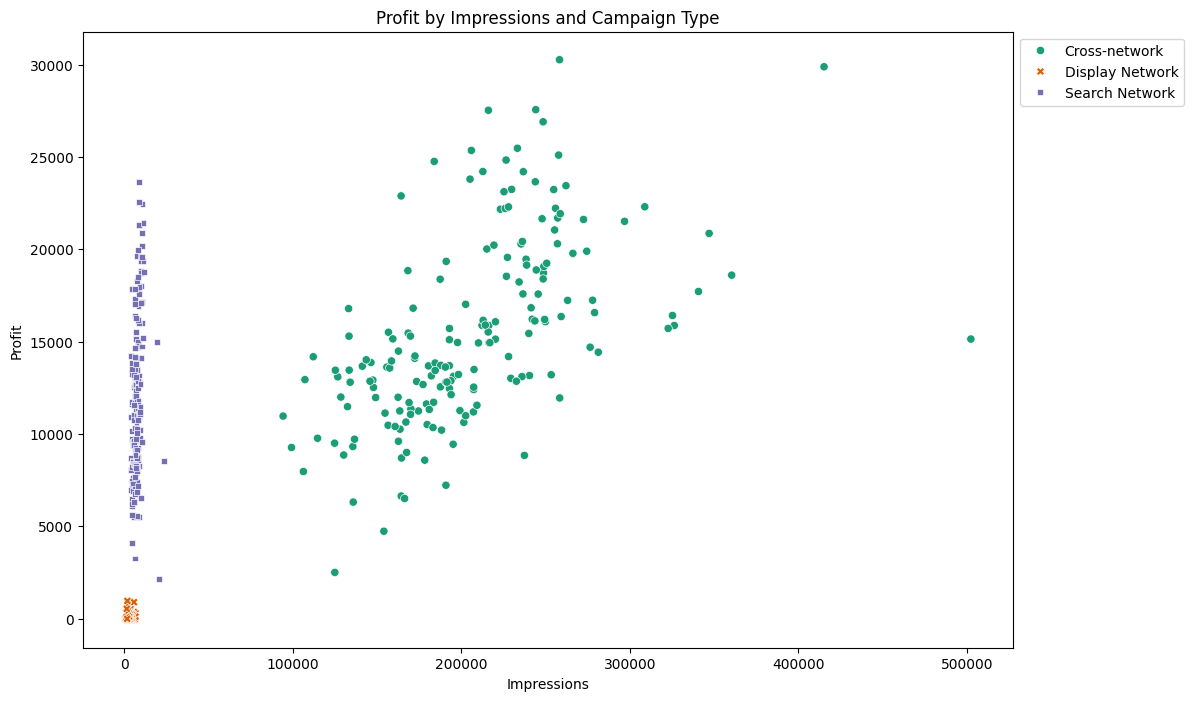

In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Impressions', y='profit', data=df, hue='Campaign type', palette='Dark2', style='Campaign type')
plt.xlabel('Impressions')
plt.ylabel('Profit')
plt.title('Profit by Impressions and Campaign Type')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


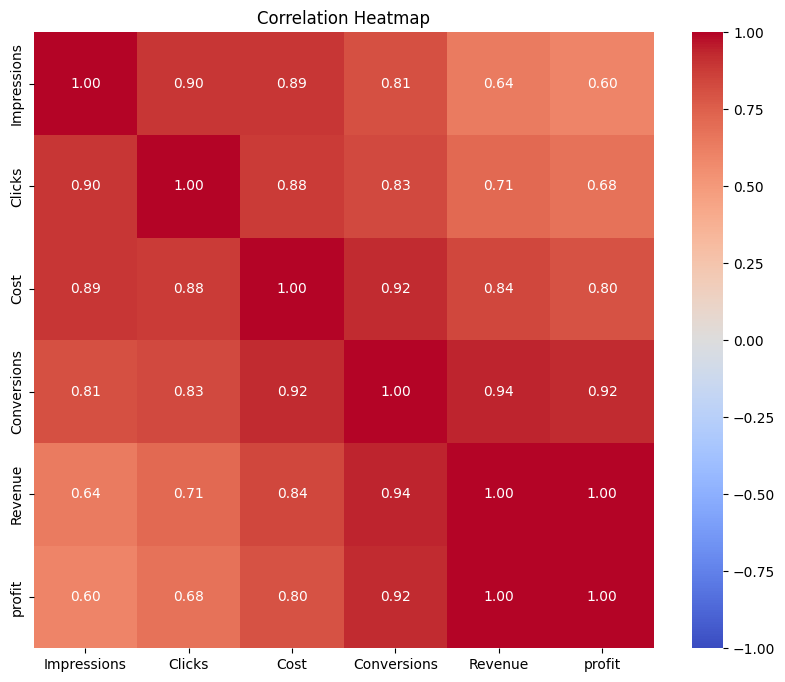

In [ ]:

correlation_matrix = df[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue', 'profit']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


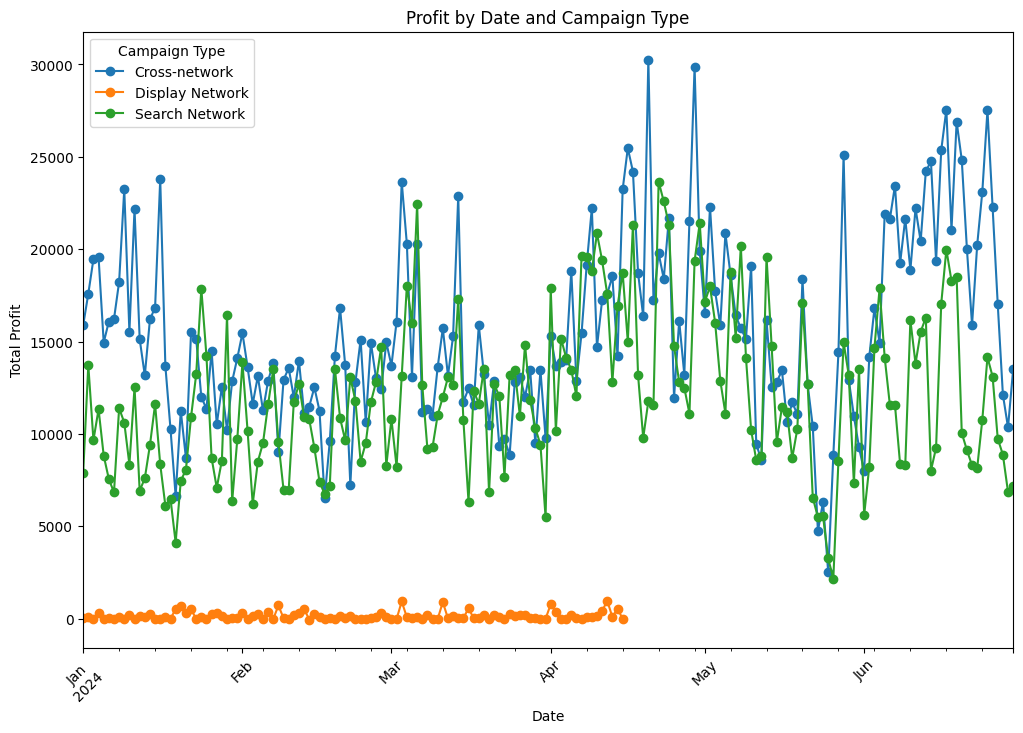

In [ ]:

profit_by_date_campaign = df.groupby(['Date', 'Campaign type'])['profit'].sum().unstack()


profit_by_date_campaign.plot(kind='line', marker='o', figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.title('Profit by Date and Campaign Type')
plt.xticks(rotation=45)
plt.legend(title='Campaign Type')
plt.show()


In [ ]:

aggregated_data = df.groupby(['Campaign type']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Cost': 'sum',
    'Conversions': 'sum',
    'Revenue': 'sum'
}).reset_index()


In [ ]:
aggregated_data.to_csv('googlebudget_data.csv', index=False)

In [ ]:
aggregated_data['profit']=aggregated_data['Revenue']-aggregated_data['Cost']

In [ ]:
aggregated_data

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,profit
0,Cross-network,37580588.0,441745.0,343674.0,23165.9,3166297.3,2822623.3
1,Display Network,353827.0,11865.0,2951.7,108.1,18460.4,15508.7
2,Search Network,1385843.0,149630.0,149558.8,12464.0,2330129.0,2180570.2


In [ ]:

total_profit = aggregated_data['profit'].sum()
total_revenue = aggregated_data['Revenue'].sum()

aggregated_data['ROI'] = (aggregated_data['profit'] / aggregated_data['Cost'])
profit_margin_percentage = (total_profit / total_revenue) * 100

print(f'Total Profit Margin Percentage: {profit_margin_percentage:.2f}%')

Total Profit Margin Percentage: 91.00%


In [ ]:
df['Cost'].sum()

496184.50000000006

In [ ]:
df['Revenue'].sum()

5514886.699999999

In [ ]:
df['profit'].sum()

5018702.2

In [ ]:
total_profit = df['profit'].sum()
total_cost = df['Cost'].sum()

df['Roi']=(df['profit']/df['Cost'])
roi_percentage = (total_profit / total_cost) * 100

print(f'Total ROI Percentage: {roi_percentage:.2f}%')

Total ROI Percentage: 1011.46%


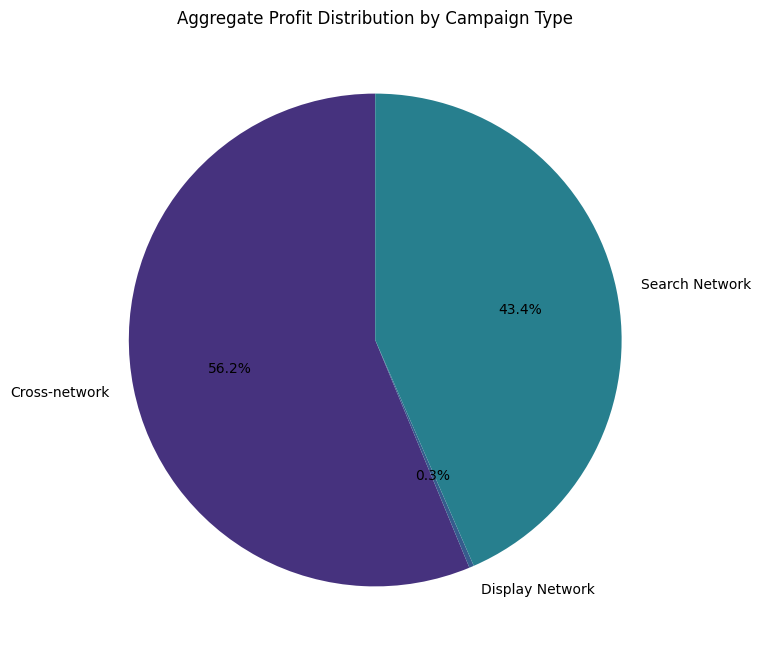

In [ ]:

plt.figure(figsize=(8, 8))
plt.pie(aggregated_data['profit'], labels=aggregated_data['Campaign type'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Aggregate Profit Distribution by Campaign Type')
plt.show()


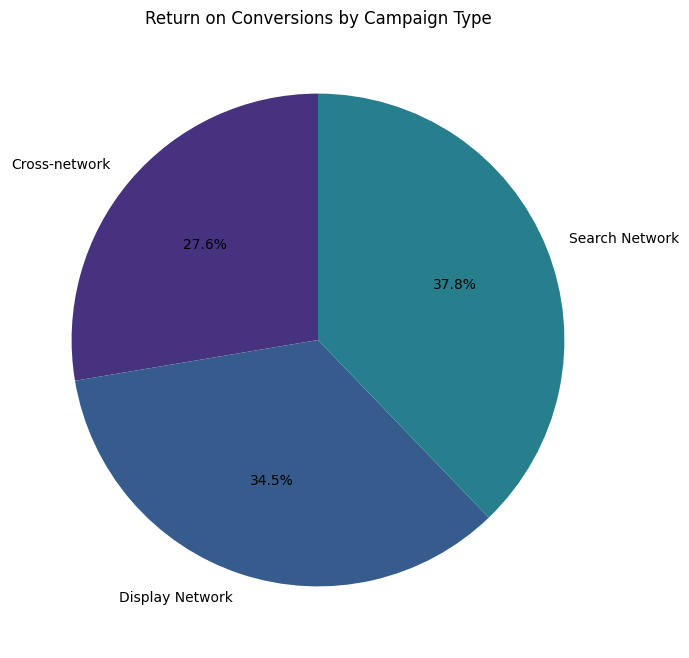

In [ ]:

aggregated_data['Return on Conversions'] = aggregated_data['Revenue'] / aggregated_data['Conversions']


plt.figure(figsize=(8, 8))
plt.pie(aggregated_data['Return on Conversions'], labels=aggregated_data['Campaign type'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Return on Conversions by Campaign Type')
plt.show()


In [ ]:
aggregated_data['Conversion Rate (%)'] = (aggregated_data['Conversions'] / aggregated_data['Cost']) * 100



In [ ]:
aggregated_data

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,profit,Return on Conversions,Conversion Rate (%),ROI
0,Cross-network,37580588.0,441745.0,343674.0,23165.9,3166297.3,2822623.3,136.679227,6.740661,8.213084
1,Display Network,353827.0,11865.0,2951.7,108.1,18460.4,15508.7,170.771508,3.662296,5.254159
2,Search Network,1385843.0,149630.0,149558.8,12464.0,2330129.0,2180570.2,186.948732,8.333846,14.580019


In [ ]:
aggregated_data.to_csv('googlebudget_data.csv', index=False)

In [ ]:

average_profit_by_campaign = df.groupby('Campaign type')['profit'].mean().reset_index()


average_profit_by_campaign = average_profit_by_campaign.sort_values(by='profit', ascending=False)

print(average_profit_by_campaign)


     Campaign type        profit
0    Cross-network  15508.919231
2   Search Network  11981.154945
1  Display Network    146.308491


In [ ]:

metrics_by_campaign = aggregated_data.groupby('Campaign type').agg({
    'profit': 'mean',
    'ROI': 'mean'
}).reset_index()


metrics_by_campaign = metrics_by_campaign.sort_values(by='profit', ascending=False)

print(metrics_by_campaign)


     Campaign type     profit        ROI
0    Cross-network  2822623.3   8.213084
2   Search Network  2180570.2  14.580019
1  Display Network    15508.7   5.254159


In [ ]:
aggregated_data

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,profit,Return on Conversions,Conversion Rate (%),ROI
0,Cross-network,37580588.0,441745.0,343674.0,23165.9,3166297.3,2822623.3,136.679227,6.740661,8.213084
1,Display Network,353827.0,11865.0,2951.7,108.1,18460.4,15508.7,170.771508,3.662296,5.254159
2,Search Network,1385843.0,149630.0,149558.8,12464.0,2330129.0,2180570.2,186.948732,8.333846,14.580019
